# Lab 8:  Coupled oscillators

- **Goal**: introduce normal modes, beats, and energy propagation.
- Consider a one-dimensional chain of $N$ particles each of mass
  $m$ with equal equilibrium separation $a$. 
- Particles are coupled by massless springs with force constant
  $k_c$, except for the two end springs which have spring constant
  $k$.
- Let $u_i$ be the displacement from equilibrium of the $i$th mass
  along the axis of the system.
- The ends of the left- and right-hand springs are assumed fixed.
- Boundary conditions

\begin{equation*}
u_0 = u_{N+1} = 0
\end{equation*}

- The equation of motion for the $i$ th particle is

\begin{align*}
m \frac{ d^2u_i}{dt^2} = -k_c(u_i - u_{i+1}) - k_c(u_i - u_{i-1}) \nonumber \\
 =  -k_c(2 u_i - u_{i+1} - u_{i-1}) \nonumber
\end{align*}

- The equations for particles $i$ = 1 and $N$ next to the walls
  are given by

\begin{align*}
m \frac{ d^2u_1}{dt^2} = -k_c(u_1 - u_{2}) - ku_1 \nonumber \\
m \frac{ d^2u_N}{dt^2}  = -k_c(u_N - u_{N-1} - ku_{N}) \nonumber 
\end{align*}

-  The above equations of motion describe {\em longitudinal}
  oscillations, i.e., motion along the length of the system.

## Exercise 1:  

Study the code below and comment as necessary.  The animation methods do not work in Notebook (but do from the command line).

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

class N_chain:

    def __init__(self,N,m,kc,k,omega_0):
        self.N = N
        self.x = np.zeros(N)
        self.v = np.zeros(N)
        self.m = m
        self.kc = kc
        self.k = k
        self.omega_0 = omega_0
        self.xarr = []
        self.varr = []
        self.time = []
        
    def F0(self,x,v,t):
        return np.array([v,-self.kc*(x[1] - x[2]) - self.k*x[1] + (0.5*self.kc)*np.cos(self.omega_0*t)])   
                        #v; -kc(u_i - u_(i+1)) - k*u_(i) + 0.5kc(cos(omega*t))
                            #x(t) = A*cos(omega*t (+ phase))
    
    def FN(self,x,v,t):
        return np.array([v,-self.kc*(x[1] - x[0]) - self.k*x[1]]) #v, -kc(u_i -u_(i-1)) - k(u_i)

    def Fi(self,x,v,t):
        return np.array([v,-self.kc*(2*x[1] - x[2] - x[0])])     #v, -kc(2u_i - u_(i+1) - u_(i-1))

    def rk4_step(self,F,x,v,t):
        k1 = dt*F(x,v,t)         
        k2 = dt*F(x + 0.5*k1[0], v + 0.5*k1[1],t)
        k3 = dt*F(x + 0.5*k2[0], v + 0.5*k2[1],t)
        k4 = dt*F(x + k3[0], v + k3[1],t)
        x[1] = x[1] + (k1[0] + 2*k2[0] + 2*k3[0] + k4[0])/6.
        v = v + (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])/6.
        return x[1],np.array(v)
    
    def rk4_chain(self,tfinal,dt):  
        t = 0.0
        while t < tfinal+dt:
            xn = self.x
            vn = self.v
            self.time.append(t)
            for i in range(len(self.x)):
                self.xarr.append(self.x[i])
                self.varr.append(self.v[i])
            self.x[0],self.v[0] = self.rk4_step(self.F0, np.array([0,xn[0],xn[1]]),vn[0],t)
            self.x[self.N-1],self.v[self.N-1] = self.rk4_step(self.FN,np.array([xn[self.N-2],xn[self.N-1],0]),vn[self.N-1],t)
            if (self.N > 2):
                for i in range(1,self.N-1):
                    self.x[i],self.v[i] = self.rk4_step(self.Fi,np.array([xn[i-1],xn[i],xn[i+1]]),vn[i],t)            
            t = t + dt           
            
    def animate(self,nstep): #only plots for two or three masses        
        lines=[]
        fig, ax = plt.subplots()
        for i in range(0,int(len(self.xarr)/self.N),N*nstep):
            p1 = ax.plot(self.xarr[i]+1, 0., 'bo', \
                         self.xarr[i+1]+2, 0., 'ro', \
                         self.xarr[i+2]+3, 0., 'co', \
                             markersize=10)
            lines.append(p1)
            ax.set_aspect('equal')
            ax.set_ylim(-0.2,0.2)
        ani = animation.ArtistAnimation(fig, lines, interval=10)
        plt.show()

    def animate10(self,nstep): #only plots for 10 masses        
        lines=[]
        fig, ax = plt.subplots()
        for i in range(0,int(len(self.xarr)/self.N),N*nstep):
            p1 = ax.plot(self.xarr[i]+1, 0., 'ro', \
                         self.xarr[i+1]+2, 0., 'ro', \
                         self.xarr[i+2]+3, 0., 'ro', \
                         self.xarr[i+3]+4, 0., 'ro', \
                         self.xarr[i+4]+5, 0., 'ro', \
                         self.xarr[i+5]+6, 0., 'ro', \
                         self.xarr[i+6]+7, 0., 'ro', \
                         self.xarr[i+7]+8, 0., 'ro', \
                         self.xarr[i+8]+9, 0., 'ro', \
                         self.xarr[i+9]+10, 0., 'ro', \
                             markersize=5)
            lines.append(p1)
            ax.set_aspect('equal')
            ax.set_ylim(-0.2,0.2)
        ani = animation.ArtistAnimation(fig, lines, interval=10)
        plt.show()

    def plot_N_masses(self):
        fig, axs = plt.subplots(self.N)
        for i in range(self.N):
            axs[i].plot(self.time, self.xarr[i::self.N])
            axs[i].set(xlabel='time', ylabel='u'+str(i))
        for ax in axs.flat:
            ax.label_outer()
        plt.show()
        

## Exercise 2: Motion of two coupled oscillators

Investigate the motion of two masses.  Set the velocities of both particles equal to zero for all runs in this problem.  

1. Choose initial conditions $u_1(0) = 0.5$, $u_2(0) = 0$ and compute the time-dependence of $u_1$ and $u_2$ for a) $k= 1$ and $k_c = 0.8$ and b) $k= 1$ and $k_c = 1$.  Determine reasonable values for the time step $\Delta t$ and the time of the run, $tmax$.  (Set the mass of the particles to unity.)  Is it possible to define a period of motion in the first case?  What is the period of motion in the second case?

2. Set $k= 1$ and $k_c = 0.2$.  This is a case of *weak coupling*.  Can you identify two kinds of oscillations superimposed upon each other?  

3. Choose initial conditions $u_1(0) = 0.5$, $u_2(0) = 0.5$ so that both particles have equal displacements. Set $k= 1$ and $k_c = 0.1$. Describe the observed motion.  Compute the energy (kinetic plus potential) of each particle.  Does the period of motion depend on $k_c$?  What is the dependence of motion on $k$?

4. Consider initial conditions $u_1(0) = 0.5$, $u_2(0) = -0.5$ so that both particles have equal but *opposite* displacements.  Determine the dependence of $\omega^2$ on $k$ and $k_c$.

5. Discuss your results in terms of *normal modes*.

Exercise 2;Part 1;case a (kc = 0.8)


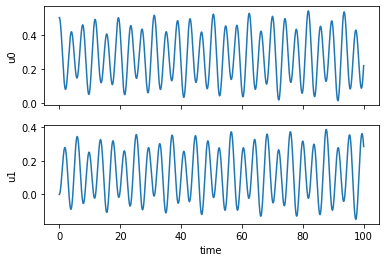

Exercise 2;Part 1;case b (kc = 1)


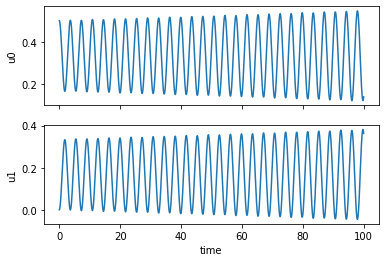

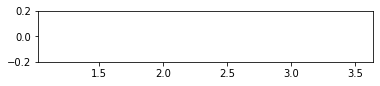

In [3]:
#u1(0) = 0.5
#u2(0) = 0
#m = all same
#__init__(self,N,m,kc,k,omega_0):

N = 2             #number of particles
m = 1             #mass (all particles have same)
k = 1             #spring constant for non-coupled springs
kca = 0.8         #coupled spring constant (for case a of part 1 of exercise 2)
omega_0 = 0       
u1i = 0.5         #initial position for particle 1
u2i = 0           #initial position for particle 2
tfinal = 100
dt = 0.01

#1.a
a1 = N_chain(N,m,kca,k,0)
a1.x[0] = u1i
a1.x[1] = u2i

a1.rk4_chain(tfinal,dt)
print("Exercise 2;Part 1;case a (kc = 0.8)")
a1.plot_N_masses()


#1.b
kcb = 1           #coupled spring constant (for case b of part 1 of exercise 2)
b1 = N_chain(N,m,kcb,k,0)
b1.x[0] = u1i
b1.x[1] = u2i

b1.rk4_chain(tfinal,dt)
print("Exercise 2;Part 1;case b (kc = 1)")
b1.plot_N_masses()
b1.animate(1)

2. Set $k= 1$ and $k_c = 0.2$.  This is a case of *weak coupling*.  Can you identify two kinds of oscillations superimposed upon each other?  

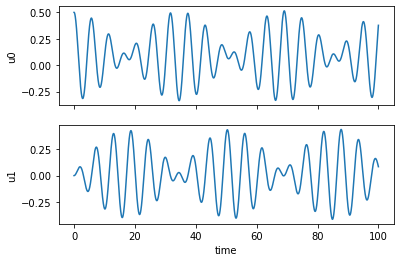

In [3]:
#Exercise 2; part 2
k = 1                     #(I didn't have to repeat this here but it's just easier to see what was used for k)
kc2 = 0.2                 #coupled spring constant for part 2 of exercise 2

P2 = N_chain(N,m,kc2,k,omega_0)
P2.x[0] = u1i

P2.rk4_chain(tfinal,dt)
P2.plot_N_masses()


3. Choose initial conditions $u_1(0) = 0.5$, $u_2(0) = 0.5$ so that both particles have equal displacements. Set $k= 1$ and $k_c = 0.1$. Describe the observed motion.  Compute the energy (kinetic plus potential) of each particle.  Does the period of motion depend on $k_c$?  What is the dependence of motion on $k$?

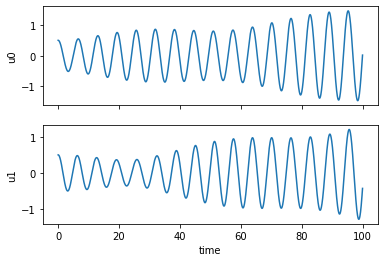

Text(0, 0.5, 'Energy')

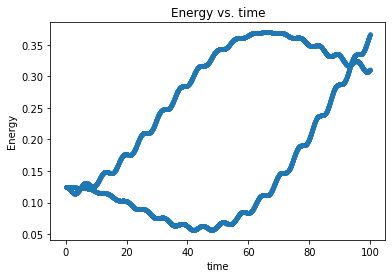

In [5]:
#Exercise 2; part 3
u1i = 0.5                   #initial position for particle 1
u2i_3 = 0.5                 #initial position for particle 2 (for part 3)
k = 1                       #(I didn't have to repeat this here but it's just easier to see what was used for k)
kc3 = 0.1                   #coupled spring constant kc for part 3 of exercise 2
omega0_3 = np.sqrt((k/m))   #omega (since both particles start at same position, omega is not affected by kc) 
                            #or are we still supposed to use omega=0? b/c that produces something pretty cool too

P3 = N_chain(N,m,kc3,k,omega0_3)
P3.x[0] = u1i
P3.x[1] = u2i_3

P3.rk4_chain(tfinal,dt)
P3.plot_N_masses()

#Energy = 0.5mv^2 + 0.5kx^2
E = []
for i in range(len(P3.time)):
    E.append(0.5*P3.m*(P3.varr[i]**2) + 0.5*P3.k*(P3.xarr[i]**2))

plt.plot(P3.time,E,".")
plt.title("Energy vs. time")
plt.xlabel("time")
plt.ylabel("Energy")

4. Consider initial conditions $u_1(0) = 0.5$, $u_2(0) = -0.5$ so that both particles have equal but *opposite* displacements.  Determine the dependence of $\omega^2$ on $k$ and $k_c$.

kc = 0.1


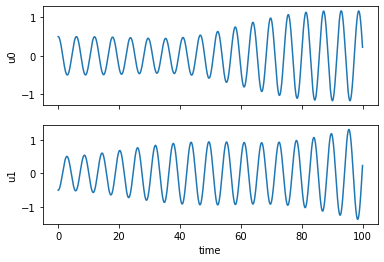

kc = 0.3


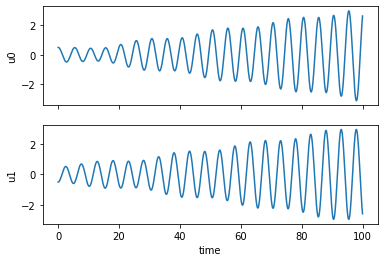

kc = 0.5


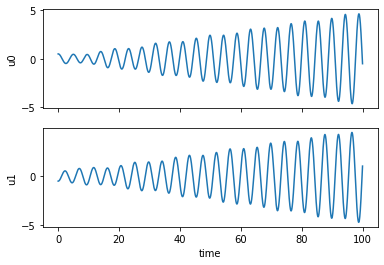

kc = 0.7


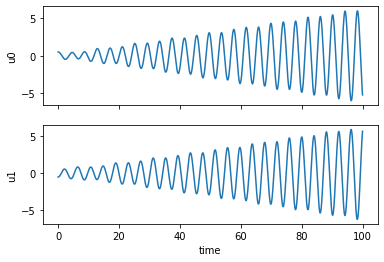

kc = 0.9


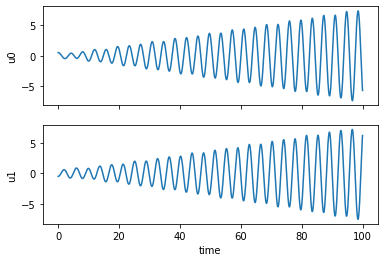

In [5]:
u1i = 0.5                          #initial position of particle 1 (this is doesn't have to be repeated either)
u2i_4 = -0.5                       #initial position of particle 2 for part 4 of exercise 2

kc4 = np.arange(0.1,1.1,0.2)       #varying values for kc (for part 4)
omega4 = []                        #different omega values      
for j in range(len(kc4)):
    omega4.append(np.sqrt((k+2*kc4[j])/m))     #omega^2 = (k+2*kc)/m (for particles w/ displacement in opp. directions)
    P4 = N_chain(N,m,kc4[j],k,omega4[j])
    P4.x[0] = u1i
    P4.x[1] = u2i_4
    P4.rk4_chain(tfinal,dt)
    print("kc =",round(kc4[j],2))
    P4.plot_N_masses()

## Exercise 3: 

1. Run the program with $N= 3$, $k_c = 0.2$, $k = 1$ and arbitrary but non-zero initial displacements. Describe the time-dependence of the displacements of the particles.

2. Now consider the following three cases and discuss the results in the context of *normal modes*:

| | $u_0(1)$ | $u_0(2)$ | $u_0(3)$ |
|-------------:|--------------:|-------------:|-----------:|
|case 1 | &nbsp; &nbsp;&nbsp; &nbsp;0.5 | &nbsp; &nbsp;&nbsp; &nbsp;0.5 | &nbsp; &nbsp;&nbsp; &nbsp;0.5 |
|case 2 | 0.5 | -0.5 | 0.5 |
|case 3 | 0.5 | 0 | -0.5|

What are the normal mode frequencies?

3. Add an external driving force to particle 1 and determine the normal mode frequencies.  Compare with the results from part 2.

4.  Repeat part 3, but with $N=10$ and $k = k_c = 1$. Try values of $\omega$ in the range $0.2\sqrt{k/m}$ to $3 \sqrt{k/m}$ to find at least one resonance.  Verify a few cases with the following analytical result for the normal frequencies

\begin{equation*}
\omega_n^2 = \frac{4 k}{m} \sin^2\frac{n \pi}{2(N+1)}.
\end{equation*}

5.  Perturb the chain at one end (e.g., $u_1(0) = 1$) and determine the time it takes to for a disturbance to travel a given distance.  This illustrates the propagation of energy.  Estimate $v$.  Consider larger values of $N$ to ensure that your estimate is independent of $N$.

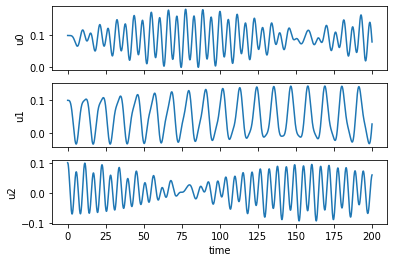

In [6]:
N3 = 3                      #number of particles for exercise 3
k = 1                      
kc_3 = 0.2                  #coupled spring constant for exercise 3 part 1
omega3 = 0                  #np.sqrt(k/m)
u1 = 0.1
u2 = 0.1
u3 = 0.1
tfinal3 = 200

E3_1 = N_chain(N3,m,kc_3,k,omega3)
E3_1.x[0] = u1
E3_1.x[1] = u2
E3_1.x[2] = u3

E3_1.rk4_chain(tfinal3,dt)
E3_1.plot_N_masses()

2. Now consider the following three cases and discuss the results in the context of *normal modes*:

| | $u_0(1)$ | $u_0(2)$ | $u_0(3)$ |
|-------------:|--------------:|-------------:|-----------:|
|case 1 | &nbsp; &nbsp;&nbsp; &nbsp;0.5 | &nbsp; &nbsp;&nbsp; &nbsp;0.5 | &nbsp; &nbsp;&nbsp; &nbsp;0.5 |
|case 2 | 0.5 | -0.5 | 0.5 |
|case 3 | 0.5 | 0 | -0.5|

What are the normal mode frequencies?

Case 1


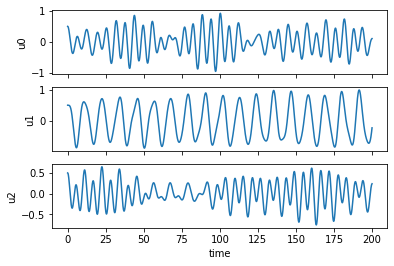

Case 2


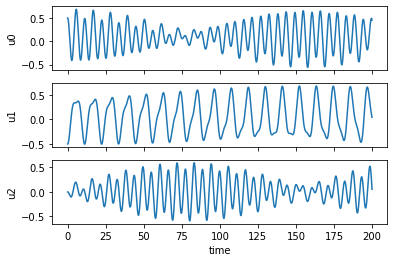

Case 3


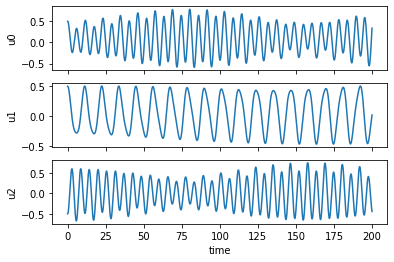

In [7]:
#Exercise 3; part 2
u_1i = [0.5,0.5,0.5]
u_2i = [0.5,-0.5,0.5]
u_3i = [0.5,0,-0.5]

omega_3 = []
for l in range(len(u_1i)):
    if u_1i[l] == u_2i[l] and u_2i[l] == u_3i[l]:
        omega_3.append(np.sqrt(k/m))
    else:
        omega_3.append(0.)
        
    E3_2 = N_chain(N3,m,kc_3,k,omega_3[l])
    E3_2.x[0] = u_1i[l]
    E3_2.x[1] = u_2i[l]
    E3_2.x[2] = u_3i[l]
    E3_2.rk4_chain(tfinal3,dt)
    print("Case "+str(l+1))
    E3_2.plot_N_masses()
